In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import PIL
import os 
os.chdir('C:\\Users\\이보근\\Desktop\\빅데이터연구회\\2학기 딥러닝 1조\\프로젝트 자료\\texture')

In [8]:
import numpy as np
from PIL import Image
import math
img_path = 'C:/Users/이보근/Desktop/빅데이터연구회/2학기 딥러닝 1조/프로젝트 자료/texture/Figaro1k/Figaro1k/Original/Training'
img = Image.open(img_path + '/Frame00001-org.jpg')
img = img.resize((400, 500))

prob_map_raw = np.load('prob_map.npy')

img_origin = np.array(img)
img_dye = np.array(img)
img_final = np.zeros((500,400,3))

height = img_origin.shape[0]
weight = img_origin.shape[1]

for i in range(height):
    for j in range(weight):
        img_dye[i,j,0] = 0*img_dye[i,j,0]
        img_dye[i,j,1] = 0.278*img_dye[i,j,1]
        img_dye[i,j,2] = 0.671*img_dye[i,j,2]

prob = np.repeat(prob_map_raw, 3).reshape((500,400,3))

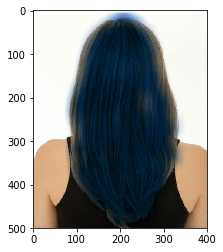

In [9]:
# origin 과 dye의 weighted sum
img_final = img_origin*(1-prob) + img_dye*prob
img_final = img_final.astype(int)
plt.imshow(img_final)

In [ ]:
# 방법 1 : 각 사진의 영향력을 더 확실하게 해준다.
w = 1-prob**2

In [ ]:
# 방법 2 : LBP개념 사용
w_k = np.array([[1,1,1],
               [1,0,1],
               [1,1,1]])/9
prob_mab_lbp = signal.convolve2d(prob_map_raw, w_k, 'same')

In [ ]:
염색(원본이미지, prob_map, r비율, g비율, b비율)